In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## Merging the 12 file into 1
df = pd.read_csv("./Sale/Sales_April_2019.csv")
files =[file for file in os.listdir("./Sale")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sale/Sales_April_2019.csv")
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_months_data.csv",index=False)
all_months_data['months'] = all_months_data['Order Date'].str[0:2]
all_months_data.head()
all_data = all_months_data.dropna(how='any')
# now we gonna find or and remove 
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data
all_data['months'] = all_data['Order Date'].str[0:2]
all_data['months'] =all_data['months'].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4


In [3]:
### which city earns the most?
def getcity(address):
    return address.split(',')[1]
def get_state(ad):
    return ad.split(',')[2].split(' ')[1]
all_data['city'] = all_data['Purchase Address'].apply(lambda x :getcity(x) +' '+ get_state(x))
all_data
# city = all_data.groupby('city').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA
...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,Los Angeles CA
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,Austin TX
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,San Francisco CA
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,Portland OR


In [4]:
# all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
df = all_data['sales']
print(df.max())


3400.0


In [ ]:
# result = all_data.groupby('months').sum()
# city most sales analysis
# import matplotlib.pyplot as plt

# keys = [city for city, df in all_data.groupby(['City'])]

# plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
# plt.ylabel('Sales in USD ($)')
# plt.xlabel('Month number')
# plt.xticks(keys, rotation='vertical', size=8)
# plt.show()

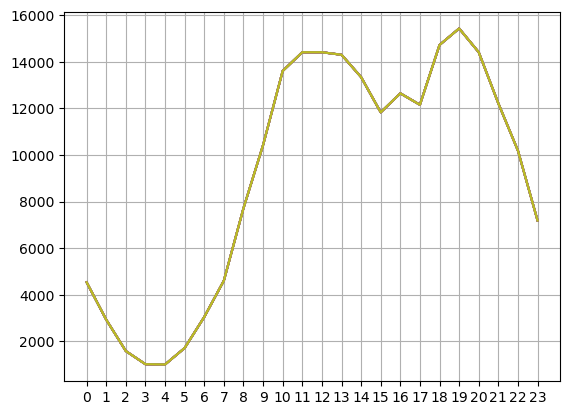

In [7]:
all_data
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()

In [28]:
# all_data['Product'].unique()
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# df.style.hide_index()
blankIndex=[''] * len(df)
df.index=blankIndex
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,city,sales,Hour
,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90,8
,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99,22
,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14
,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14
,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,9
...,...,...,...,...,...,...,...,...,...,...
,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,17
,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,Austin TX,3.84,16
,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,San Francisco CA,5.98,14
,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,Portland OR,3.84,15
